In [179]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo

In [189]:
station_info = pd.read_csv('../charles/queries/station_location_query/station_info_with_everythin.csv')

In [187]:
station_info.dropna(subset=['station_id'], inplace = True)

In [199]:
station_info.drop(index = 429, inplace = True)

In [200]:
station_info['station_id'] = station_info['station_id'].astype(int)

In [2]:
df = pd.read_csv('../communal/bike_availability_average_per_hour.csv')

In [258]:
tot_docks_df = df[['dock_id', 'tot_docks']]

In [174]:
def pivot_table_k_means_elbow_plot(filename, borough):
    df = pd.read_csv('../communal/' + filename)
    station_locations = pd.read_csv('../communal/station_locations.csv')
    station_locations['station_id'] = station_locations['station_id'].astype(int)
    bike_avail_boro = pd.merge(df, station_locations, left_on = 'dock_id', right_on = 'station_id')
    bike_avail_boro.drop(['index', 'station_id', 'street', 'neighborhood', 'zip_code'], axis = 1, inplace = True)
    bike_avail_boro = bike_avail_boro[bike_avail_boro['borough'] == borough]
    bike_avail_boro.drop(['borough'], axis = 1, inplace = True)
    bike_avail_boro = bike_avail_boro.pivot_table(index = ['dock_name', 'dock_id'], columns = 'hour', 
               values = ['avail_bikes', 'avail_docks', 'tot_docks', 
                        'avail_bikes_proportion', 'avail_docks_proportion'], aggfunc = 'mean')
    bike_avail_boro = bike_avail_boro[bike_avail_boro.isnull().sum(axis=1) == 0]
    bike_avail_boro = bike_avail_boro['avail_bikes_proportion']
    bike_avail_boro.drop([0,1,2,3,4,5,22,23], axis = 1, inplace = True)
    bike_avail_boro['6-7'] = bike_avail_boro[[6,7]].mean(axis=1)
    bike_avail_boro['8-9'] = bike_avail_boro[[8,9]].mean(axis=1)
    bike_avail_boro['10-11'] = bike_avail_boro[[10,11]].mean(axis=1)
    bike_avail_boro['12-13'] = bike_avail_boro[[12,13]].mean(axis=1)
    bike_avail_boro['14-15'] = bike_avail_boro[[14,15]].mean(axis=1)
    bike_avail_boro['16-17'] = bike_avail_boro[[16,17]].mean(axis=1)
    bike_avail_boro['18-19'] = bike_avail_boro[[18,19]].mean(axis=1)
    bike_avail_boro['20-21'] = bike_avail_boro[[20,21]].mean(axis=1)
    
    bike_avail_boro.drop(list(range(6,22)), axis = 1, inplace = True)
    
    X = bike_avail_boro
    inertia = []
    K = range(1,15)
    for k in K:
        km = kmeans.set_params(n_clusters=k)
        km = km.fit(X)
        inertia.append(km.inertia_)
    plt.plot(K, inertia, marker= "x")
    plt.xlabel('k')
    plt.xticks(np.arange(15))
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()
    return bike_avail_boro

In [260]:
def kmeans_cluster_plots(k, filename, borough):
    df = pivot_table_k_means_elbow_plot(filename, borough)
    kmean = kmeans.set_params(n_clusters = k, random_state = 0)
    kmean = kmean.fit_predict(df)
    df['cluster'] = kmean
    
    df['cluster'][df['cluster'] == 0] = 0
    df['cluster'][df['cluster'] == 3] = 0
    df['cluster'][df['cluster'] == 6] = 0
    df['cluster'][df['cluster'] == 2] = 2
    df['cluster'][df['cluster'] == 4] = 2
    df['cluster'][df['cluster'] == 5] = 2
    
    copy = df.copy(deep = True)
    copy = copy.reset_index()
    copy = copy.merge(station_info, left_on = 'dock_id', right_on = 'station_id')
    copy = copy.merge(tot_docks_df, on = 'dock_id')
    
    for i in range(k):
        cluster = df[df['cluster'] == i]
        cluster = np.array(cluster)
        for j in range(len(cluster)):
            plt.plot(range(6,22,2), cluster[j][:-1])
        plt.show()
    
    px.scatter_mapbox(copy,
                lat = 'lat',
                lon = 'lon',
                 color = 'cluster',
                 mapbox_style = 'carto-positron',
                 color_continuous_scale=['red','blue','black']
                 #size = 'tot_docks'
                 ).show()

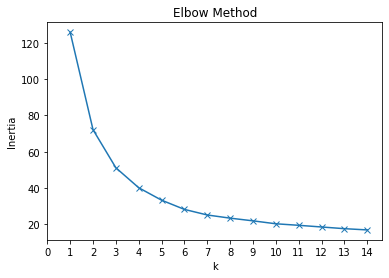

,hour,6-7,8-9,10-11,12-13,14-15,16-17,18-19,20-21
dock_name,dock_id,,,,,,,,
1 Ave & E 110 St,3496,0.637682,0.478132,0.425087,0.418281,0.429067,0.457230,0.535095,0.653776
1 Ave & E 16 St,504,0.575131,0.229686,0.104215,0.134224,0.156269,0.201209,0.549590,0.700662
1 Ave & E 18 St,2003,0.515909,0.298788,0.225000,0.175909,0.195758,0.283333,0.493939,0.599545
1 Ave & E 30 St,536,0.857143,0.639785,0.748208,0.801210,0.665323,0.302419,0.268548,0.340323
1 Ave & E 44 St,455,0.082017,0.430974,0.786754,0.740049,0.724290,0.515156,0.104407,0.071967
...,...,...,...,...,...,...,...,...,...
Washington St & Gansevoort St,405,0.532171,0.532429,0.628830,0.635648,0.689994,0.650387,0.670522,0.694503
West End Ave & W 107 St,3366,0.435251,0.188087,0.120916,0.111674,0.106932,0.132121,0.233954,0.316290
West End Ave & W 94 St,3307,0.535654,0.243301,0.140558,0.145224,0.162490,0.208813,0.375761,0.530534


In [235]:
pivot_table_k_means_elbow_plot('bike_availibility_average_per_hour_weekday_only.csv', 'Manhattan')

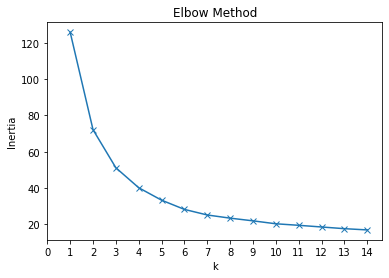

<ipython-input-260-8c4cf1fd4d8d>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-260-8c4cf1fd4d8d>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-260-8c4cf1fd4d8d>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-260-8c4cf1fd4d8d>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

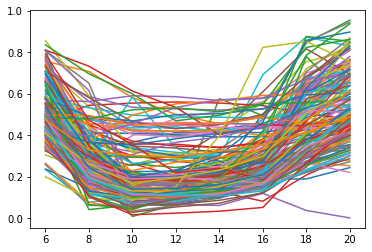

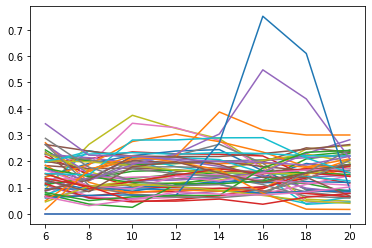

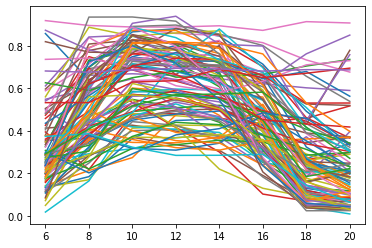

In [261]:
kmeans_cluster_plots(7, 'bike_availibility_average_per_hour_weekday_only.csv', 'Manhattan')

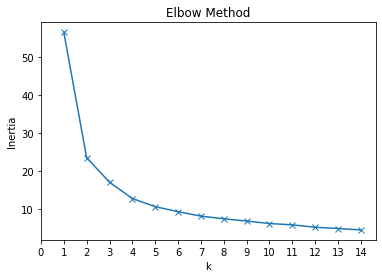

,hour,6-7,8-9,10-11,12-13,14-15,16-17,18-19,20-21
dock_name,dock_id,,,,,,,,
10 St & 5 Ave,3317,0.544185,0.487021,0.456941,0.437251,0.435111,0.440639,0.470673,0.510495
10 St & 7 Ave,3306,0.284164,0.230797,0.176400,0.172690,0.166532,0.163329,0.227747,0.291973
14 St & 5 Ave,3319,0.616922,0.437948,0.354577,0.350124,0.355276,0.398029,0.538223,0.614839
14 St & 7 Ave,3310,0.382754,0.156638,0.112789,0.111123,0.118535,0.143221,0.277778,0.390109
2 Ave & 36 St - Citi Bike HQ at Industry City,3478,0.429074,0.525388,0.680255,0.676671,0.668020,0.625149,0.460099,0.404751
...,...,...,...,...,...,...,...,...,...
Willoughby St & Fleet St,239,0.484896,0.782023,0.838862,0.566277,0.492588,0.421757,0.232955,0.181163
Wolcott St & Dwight St,3340,0.720159,0.663027,0.632767,0.628350,0.624867,0.627207,0.649877,0.690762
Wyckoff St & 3 Ave,3413,0.609589,0.466304,0.403499,0.397673,0.415850,0.454988,0.574153,0.616685


In [262]:
pivot_table_k_means_elbow_plot('bike_availibility_average_per_hour_weekday_only.csv', 'Brooklyn')

In [274]:
def kmeans_cluster_plots_brook(k, filename, borough):
    df = pivot_table_k_means_elbow_plot(filename, borough)
    kmean = kmeans.set_params(n_clusters = k, random_state = 0)
    kmean = kmean.fit_predict(df)
    df['cluster'] = kmean
    
    df['cluster'][df['cluster'] == 1] = 1
    df['cluster'][df['cluster'] == 2] = 2
    df['cluster'][df['cluster'] == 4] = 1
    df['cluster'][df['cluster'] == 5] = 1
    df['cluster'][df['cluster'] == 3] = 3
    df['cluster'][df['cluster'] == 6] = 4

    
    copy = df.copy(deep = True)
    copy = copy.reset_index()
    copy = copy.merge(station_info, left_on = 'dock_id', right_on = 'station_id')
    copy = copy.merge(tot_docks_df, on = 'dock_id')
    
    for i in range(k):
        cluster = df[df['cluster'] == i]
        cluster = np.array(cluster)
        for j in range(len(cluster)):
            plt.plot(range(6,22,2), cluster[j][:-1])
        plt.show()
    
    px.scatter_mapbox(copy,
                lat = 'lat',
                lon = 'lon',
                 color = 'cluster',
                 mapbox_style = 'carto-positron',
                 color_continuous_scale=['red','yellow','green','blue','black']
                 #size = 'tot_docks'
                 ).show()

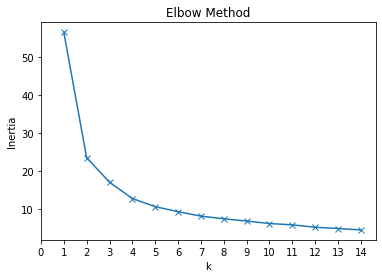

<ipython-input-274-5486e7056127>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-274-5486e7056127>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-274-5486e7056127>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-274-5486e7056127>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

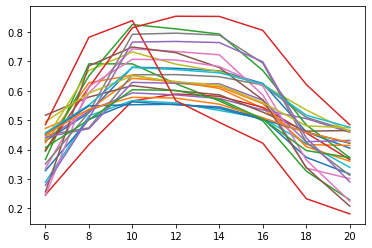

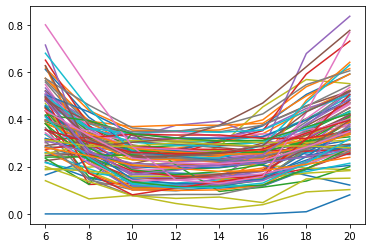

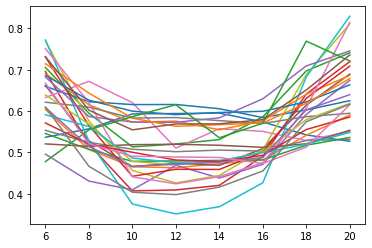

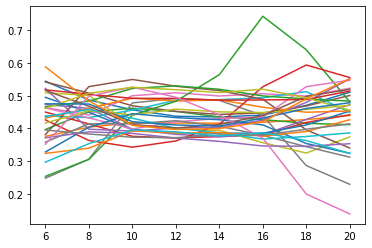

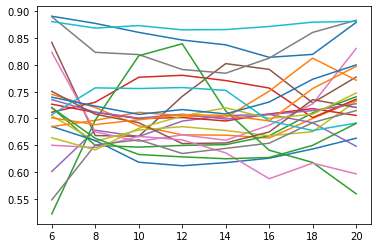

In [275]:
kmeans_cluster_plots_brook(7, 'bike_availibility_average_per_hour_weekday_only.csv', 'Brooklyn')

In [57]:
station_locations = pd.read_csv('../communal/station_locations.csv')

In [60]:
station_locations['station_id'] = station_locations['station_id'].astype(int)

In [65]:
bike_avail_boro = pd.merge(df, station_locations, left_on = 'dock_id', right_on = 'station_id')
bike_avail_boro.drop(['index', 'station_id', 'street', 'neighborhood', 'zip_code'], axis = 1, inplace = True)

In [84]:
bike_avail_manhattan = bike_avail_boro[bike_avail_boro['borough'] == 'Manhattan']

In [85]:
bike_avail_manhattan.drop(['borough'], axis = 1, inplace = True)

In [86]:
bike_avail_manhattan

,dock_id,dock_name,hour,avail_bikes,avail_docks,tot_docks,avail_bikes_proportion,avail_docks_proportion
0,72,W 52 St & 11 Ave,0,16.621212,38.378788,55.0,0.302204,0.697796
1,72,W 52 St & 11 Ave,1,16.833333,38.166667,55.0,0.306061,0.693939
2,72,W 52 St & 11 Ave,2,16.652174,38.347826,55.0,0.302767,0.697233
3,72,W 52 St & 11 Ave,3,16.528571,38.471429,55.0,0.300519,0.699481
4,72,W 52 St & 11 Ave,4,16.351351,38.648649,55.0,0.297297,0.702703
...,...,...,...,...,...,...,...,...
15345,3536,W 116 St & Broadway,23,1.500000,41.500000,43.0,0.034884,0.965116
15370,3538,W 110 St & Amsterdam Ave,11,12.000000,33.000000,45.0,0.266667,0.733333
15371,3538,W 110 St & Amsterdam Ave,12,12.000000,33.000000,45.0,0.266667,0.733333
15372,3629,Adam Clayton Powell Blvd & W 126 St,11,17.000000,16.000000,33.0,0.515152,0.484848


In [87]:
bike_avail_manhattan = bike_avail_manhattan.pivot_table(index = ['dock_name', 'dock_id'], columns = 'hour', 
               values = ['avail_bikes', 'avail_docks', 'tot_docks', 
                        'avail_bikes_proportion', 'avail_docks_proportion'], aggfunc = 'mean')
pd.set_option("display.max_columns", None)

In [88]:
bike_avail_manhattan = bike_avail_manhattan[bike_avail_manhattan.isnull().sum(axis=1) == 0]

In [89]:
bike_avail_manhattan = bike_avail_manhattan['avail_bikes_proportion']

In [90]:
bike_avail_manhattan.drop([0,1,2,3,4,5,22,23], axis = 1, inplace = True)

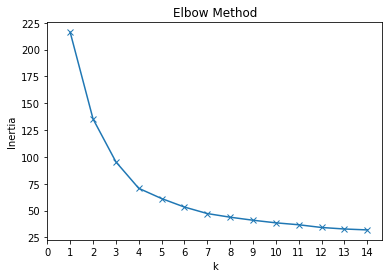

In [92]:
X = bike_avail_manhattan
inertia = []
K = range(1,15)
for k in K:
    km = kmeans.set_params(n_clusters=k)
    km = km.fit(X)
    inertia.append(km.inertia_)
plt.plot(K, inertia, marker= "x")
plt.xlabel('k')
plt.xticks(np.arange(15))
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [106]:
kmean = kmeans.set_params(n_clusters = 5)
kmean = kmean.fit_predict(bike_avail_manhattan)
bike_avail_manhattan['cluster'] = kmean

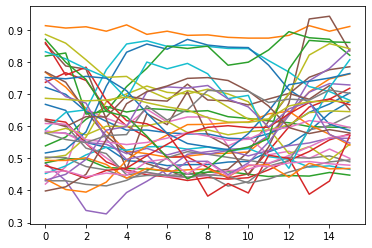

In [111]:
cluster_0 = bike_avail_manhattan[bike_avail_manhattan['cluster'] == 4]
cluster_0 = np.array(cluster_0)
for i in range(len(cluster_0)):
    plt.plot(range(16), cluster_0[i][:-1])

In [4]:
table = df.pivot_table(index = ['dock_name', 'dock_id'], columns = 'hour', 
               values = ['avail_bikes', 'avail_docks', 'tot_docks', 
                        'avail_bikes_proportion', 'avail_docks_proportion'], aggfunc = 'mean')
pd.set_option("display.max_columns", None)

In [5]:
table.head(3)

avail_bikes                        \
hour                                               0          1          2    
dock_name                         dock_id                                     
 Queens Plaza North & Crescent St 3129            NaN        NaN        NaN   
1 Ave & E 110 St                  3496      18.244681  18.247227  18.621578   
1 Ave & E 16 St                   504       35.139535  35.534091  37.032967   

                                                                            \
hour                                              3          4          5    
dock_name                         dock_id                                    
 Queens Plaza North & Crescent St 3129           NaN        NaN  20.000000   
1 Ave & E 110 St                  3496     18.476510  18.453782  17.660142   
1 Ave & E 16 St                   504      35.420455  36.043478  35.621951   

                                                                            \
hour                                              6          7          8    
dock_name                         dock_id                                    
 Queens Plaza North & Crescent St 3129     17.000000  16.750000  16.000000   
1 Ave & E 110 St                  3496     16.710993  16.240437  13.744526   
1 Ave & E 16 St                   504      32.960000  27.460674  19.373494   

                                                                            \
hour                                              9          10         11   
dock_name                         dock_id                                    
 Queens Plaza North & Crescent St 3129     16.000000  15.000000  15.200000   
1 Ave & E 110 St                  3496     13.363636  12.313975  12.228417   
1 Ave & E 16 St                   504      12.475000   8.105263   8.600000   

                                                                            \
hour                                              12         13         14   
dock_name                         dock_id                                    
 Queens Plaza North & Crescent St 3129     15.000000  15.000000        NaN   
1 Ave & E 110 St                  3496     11.936823  12.011009  12.024209   
1 Ave & E 16 St                   504       7.292135   8.714286   8.220779   

                                                                            \
hour                                              15         16         17   
dock_name                         dock_id                                    
 Queens Plaza North & Crescent St 3129           NaN        NaN        NaN   
1 Ave & E 110 St                  3496     12.216015  12.267504  13.014599   
1 Ave & E 16 St                   504       8.337209   8.397727  11.458824   

                                                                            \
hour                                              18         19         20   
dock_name                         dock_id                                    
 Queens Plaza North & Crescent St 3129           NaN        NaN        NaN   
1 Ave & E 110 St                  3496     13.564057  14.628774  16.013865   
1 Ave & E 16 St                   504      22.025000  28.593023  31.402062   

                                                                            \
hour                                              21         22         23   
dock_name                         dock_id                                    
 Queens Plaza North & Crescent St 3129           NaN        NaN        NaN   
1 Ave & E 110 St                  3496     16.937943  17.525424  18.103806   
1 Ave & E 16 St                   504      32.307692  34.250000  35.068966   

                                          avail_bikes_proportion            \
hour                                                          0         1    
dock_name                         dock_id                                    
 Queens Plaza North & Crescent St 3129            

In [6]:
table[table.isnull().sum(axis=1) == 0].head(3)

avail_bikes                                   \
hour                              0          1          2          3    
dock_name        dock_id                                                
1 Ave & E 110 St 3496      18.244681  18.247227  18.621578  18.476510   
1 Ave & E 16 St  504       35.139535  35.534091  37.032967  35.420455   
1 Ave & E 18 St  2003      21.000000  26.875000  27.000000  35.500000   

                                                                      \
hour                             4          5          6          7    
dock_name        dock_id                                               
1 Ave & E 110 St 3496     18.453782  17.660142  16.710993  16.240437   
1 Ave & E 16 St  504      36.043478  35.621951  32.960000  27.460674   
1 Ave & E 18 St  2003     25.714286  34.500000  25.142857  22.800000   

                                                                      \
hour                             8          9          10         11   
dock_name        dock_id                                               
1 Ave & E 110 St 3496     13.744526  13.363636  12.313975  12.228417   
1 Ave & E 16 St  504      19.373494  12.475000   8.105263   8.600000   
1 Ave & E 18 St  2003     24.333333  14.625000  15.285714  12.500000   

                                                                      \
hour                             12         13         14         15   
dock_name        dock_id                                               
1 Ave & E 110 St 3496     11.936823  12.011009  12.024209  12.216015   
1 Ave & E 16 St  504       7.292135   8.714286   8.220779   8.337209   
1 Ave & E 18 St  2003      7.750000  10.571429   8.000000  11.000000   

                                                                      \
hour                             16         17         18         19   
dock_name        dock_id                                               
1 Ave & E 110 St 3496     12.267504  13.014599  13.564057  14.628774   
1 Ave & E 16 St  504       8.397727  11.458824  22.025000  28.593023   
1 Ave & E 18 St  2003     11.777778  13.666667  19.666667  17.666667   

                                                                      \
hour                             20         21         22         23   
dock_name        dock_id                                               
1 Ave & E 110 St 3496     16.013865  16.937943  17.525424  18.103806   
1 Ave & E 16 St  504      31.402062  32.307692  34.250000  35.068966   
1 Ave & E 18 St  2003     23.714286  23.500000  22.166667  28.625000   

                         avail_bikes_proportion                                \
hour                                         0         1         2         3    
dock_name        dock_id                                                        
1 Ave & E 110 St 3496                  0.729787  0.729889  0.744863  0.739060   
1 Ave & E 16 St  504                   0.663010  0.670455  0.698735  0.668310   
1 Ave & E 18 St  2003                  0.381818  0.488636  0.490909  0.645455   

                                                                            \
hour                            4         5         6         7         8    
dock_name        dock_id                                                     
1 Ave & E 110 St 3496     0.738151  0.706406  0.668440  0.649617  0.549781   
1 Ave & E 16 St  504      0.680066  0.672112  0.621887  0.518126  0.365538   
1 Ave & E 18 St  2003     0.467532  0.627273  0.457143  0.414545  0.442424   

                                                                            \
hour                            9         10        11        12        13   
dock_name        dock_id                                                     
1 Ave & E 110 St 3496     0.534545  0.492559  0.489137  0.477473  0.480440   
1 Ave & E 16 St  504      0.235377  0.152929  0.162264  0.137587  0.164420   
1 Ave & E 18 St  2003     0.265909  0.277922  0.227273  0.140909  0.192208 

In [7]:
avail_bikes_proportion = table['avail_bikes_proportion']

In [8]:
avail_bikes_proportion = avail_bikes_proportion[avail_bikes_proportion.isnull().sum(axis=1) == 0]

In [9]:
avail_bikes_proportion.head(3)

,hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
dock_name,dock_id,,,,,,,,,,,,,,,,,,,,,,,,
1 Ave & E 110 St,3496,0.729787,0.729889,0.744863,0.739060,0.738151,0.706406,0.668440,0.649617,0.549781,0.534545,0.492559,0.489137,0.477473,0.480440,0.480968,0.488641,0.490700,0.520584,0.542562,0.585151,0.640555,0.677518,0.701017,0.724152
1 Ave & E 16 St,504,0.663010,0.670455,0.698735,0.668310,0.680066,0.672112,0.621887,0.518126,0.365538,0.235377,0.152929,0.162264,0.137587,0.164420,0.155109,0.157306,0.158448,0.216204,0.415566,0.539491,0.592492,0.609579,0.646226,0.661679
1 Ave & E 18 St,2003,0.381818,0.488636,0.490909,0.645455,0.467532,0.627273,0.457143,0.414545,0.442424,0.265909,0.277922,0.227273,0.140909,0.192208,0.145455,0.200000,0.214141,0.248485,0.357576,0.321212,0.431169,0.427273,0.403030,0.520455


In [15]:
avail_bikes = table['avail_bikes']

In [16]:
avail_bikes = avail_bikes[avail_bikes.isnull().sum(axis=1) == 0]

In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans()

In [19]:
tot_docks = table['tot_docks']

In [20]:
tot_docks = tot_docks[tot_docks.isnull().sum(axis=1) == 0]

In [21]:
tot_docks = np.array(tot_docks[0])

In [22]:
avail_bikes_proportion['tot_docks'] = tot_docks

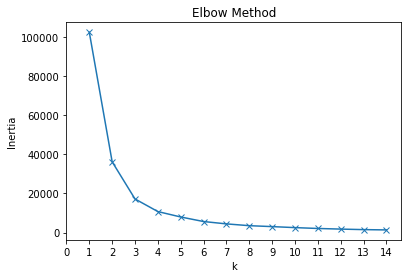

In [23]:
X = avail_bikes_proportion
inertia = []
K = range(1,15)
for k in K:
    km = kmeans.set_params(n_clusters=k)
    km = km.fit(X)
    inertia.append(km.inertia_)
plt.plot(K, inertia, marker= "x")
plt.xlabel('k')
plt.xticks(np.arange(15))
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

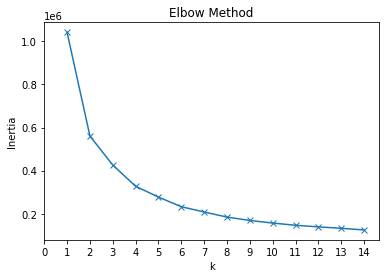

In [24]:
X = avail_bikes
inertia = []
K = range(1,15)
for k in K:
    km = kmeans.set_params(n_clusters=k)
    km = km.fit(X)
    inertia.append(km.inertia_)
plt.plot(K, inertia, marker= "x")
plt.xlabel('k')
plt.xticks(np.arange(15))
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [25]:
kmean = kmeans.set_params(n_clusters = 6)
kmean = kmean.fit_predict(avail_bikes)

In [26]:
avail_bikes['cluster'] = kmean

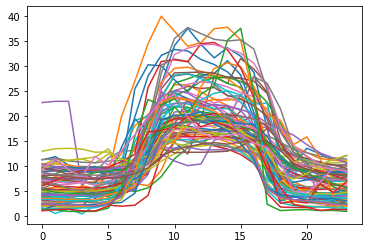

In [27]:
#Cluster based on total bike availibity per station per hour

cluster_0 = avail_bikes[avail_bikes['cluster'] == 0]
cluster_0 = np.array(cluster_0)
for i in range(len(cluster_0)):
    plt.plot(range(24), cluster_0[i][:-1])

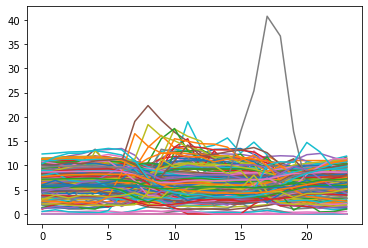

In [28]:
cluster_1 = avail_bikes[avail_bikes['cluster'] == 1]
cluster_1 = np.array(cluster_1)
for i in range(len(cluster_1)):
    plt.plot(range(24), cluster_1[i][:-1])

In [29]:
kmean = kmeans.set_params(n_clusters = 4)
kmean = kmean.fit_predict(avail_bikes_proportion)

In [30]:
len(avail_bikes_proportion)

615

In [31]:
avail_bikes_proportion['cluster'] = kmean

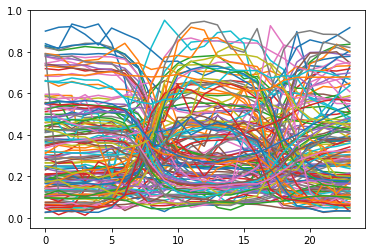

In [35]:
cluster_0 = avail_bikes_proportion[avail_bikes_proportion['cluster'] == 0]
cluster_0 = np.array(cluster_0)
for i in range(len(cluster_0)):
    plt.plot(range(24), cluster_0[i][:-2])

In [34]:
avail_bikes_proportion

,hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,tot_docks,cluster
dock_name,dock_id,,,,,,,,,,,,,,,,,,,,,,,,,,
1 Ave & E 110 St,3496,0.729787,0.729889,0.744863,0.739060,0.738151,0.706406,0.668440,0.649617,0.549781,0.534545,0.492559,0.489137,0.477473,0.480440,0.480968,0.488641,0.490700,0.520584,0.542562,0.585151,0.640555,0.677518,0.701017,0.724152,25.0,1
1 Ave & E 16 St,504,0.663010,0.670455,0.698735,0.668310,0.680066,0.672112,0.621887,0.518126,0.365538,0.235377,0.152929,0.162264,0.137587,0.164420,0.155109,0.157306,0.158448,0.216204,0.415566,0.539491,0.592492,0.609579,0.646226,0.661679,53.0,3
1 Ave & E 18 St,2003,0.381818,0.488636,0.490909,0.645455,0.467532,0.627273,0.457143,0.414545,0.442424,0.265909,0.277922,0.227273,0.140909,0.192208,0.145455,0.200000,0.214141,0.248485,0.357576,0.321212,0.431169,0.427273,0.403030,0.520455,55.0,3
1 Ave & E 30 St,536,0.503226,0.473118,0.451613,0.430108,0.419355,0.655914,0.801843,0.912442,0.731183,0.548387,0.736559,0.759857,0.786290,0.816129,0.750000,0.580645,0.467742,0.137097,0.201613,0.335484,0.212903,0.467742,0.483871,0.569892,31.0,2
1 Ave & E 44 St,455,0.078265,0.086943,0.084746,0.081014,0.072683,0.091735,0.081061,0.088695,0.211000,0.447423,0.578435,0.637223,0.582078,0.536885,0.571186,0.542881,0.487759,0.297889,0.121711,0.076271,0.075203,0.079480,0.078955,0.095417,59.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyckoff St & 3 Ave,3413,0.616102,0.637815,0.634699,0.648215,0.641722,0.626129,0.619377,0.584746,0.524045,0.460172,0.436288,0.429298,0.415018,0.409466,0.423151,0.427682,0.449310,0.475016,0.528884,0.572000,0.584480,0.588910,0.606335,0.621482,22.0,1
Wythe Ave & Metropolitan Ave,2002,0.583437,0.577376,0.575677,0.579660,0.574810,0.576273,0.579381,0.553180,0.454995,0.428542,0.426876,0.436141,0.441944,0.440637,0.457112,0.469018,0.488162,0.503888,0.548161,0.596188,0.601462,0.600323,0.604179,0.600235,27.0,2
Yankee Ferry Terminal,3182,0.686976,0.690725,0.689219,0.686495,0.697788,0.705228,0.687304,0.683707,0.679440,0.681911,0.691339,0.673644,0.660350,0.650649,0.626995,0.613236,0.612172,0.622179,0.663252,0.676897,0.678172,0.677677,0.677743,0.680545,42.0,0


In [36]:
bike_avail_df = pd.read_csv('../communal/bike_availability_average_per_hour.csv')

In [40]:
bike_avail_df = bike_avail_df[(bike_avail_df['hour'] >= 6) & (bike_avail_df['hour'] <= 21)]

In [41]:
bike_avail_df

,dock_id,dock_name,hour,avail_bikes,avail_docks,tot_docks,avail_bikes_proportion,avail_docks_proportion
6,72,W 52 St & 11 Ave,6,17.360656,37.639344,55.0,0.315648,0.684352
7,72,W 52 St & 11 Ave,7,17.960526,37.039474,55.0,0.326555,0.673445
8,72,W 52 St & 11 Ave,8,14.895522,40.104478,55.0,0.270828,0.729172
9,72,W 52 St & 11 Ave,9,11.803030,43.196970,55.0,0.214601,0.785399
10,72,W 52 St & 11 Ave,10,11.573770,43.426230,55.0,0.210432,0.789568
...,...,...,...,...,...,...,...,...
16562,3538,W 110 St & Amsterdam Ave,11,12.000000,33.000000,45.0,0.266667,0.733333
16563,3538,W 110 St & Amsterdam Ave,12,12.000000,33.000000,45.0,0.266667,0.733333
16564,3629,Adam Clayton Powell Blvd & W 126 St,11,17.000000,16.000000,33.0,0.515152,0.484848
16565,3629,Adam Clayton Powell Blvd & W 126 St,12,18.500000,14.500000,33.0,0.560606,0.439394


In [43]:
bike_avail_df = bike_avail_df.pivot_table(index = ['dock_name', 'dock_id'], columns = 'hour', 
               values = ['avail_bikes', 'avail_docks', 'tot_docks', 
                        'avail_bikes_proportion', 'avail_docks_proportion'], aggfunc = 'mean')
pd.set_option("display.max_columns", None)

In [45]:
bike_avail_df = bike_avail_df['avail_bikes_proportion']

In [46]:
bike_avail_df

,hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
dock_name,dock_id,,,,,,,,,,,,,,,,
Queens Plaza North & Crescent St,3129,0.531250,0.523438,0.500000,0.500000,0.468750,0.475000,0.468750,0.468750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1 Ave & E 110 St,3496,0.668440,0.649617,0.549781,0.534545,0.492559,0.489137,0.477473,0.480440,0.480968,0.488641,0.490700,0.520584,0.542562,0.585151,0.640555,0.677518
1 Ave & E 16 St,504,0.621887,0.518126,0.365538,0.235377,0.152929,0.162264,0.137587,0.164420,0.155109,0.157306,0.158448,0.216204,0.415566,0.539491,0.592492,0.609579
1 Ave & E 18 St,2003,0.457143,0.414545,0.442424,0.265909,0.277922,0.227273,0.140909,0.192208,0.145455,0.200000,0.214141,0.248485,0.357576,0.321212,0.431169,0.427273
1 Ave & E 30 St,536,0.801843,0.912442,0.731183,0.548387,0.736559,0.759857,0.786290,0.816129,0.750000,0.580645,0.467742,0.137097,0.201613,0.335484,0.212903,0.467742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyckoff St & 3 Ave,3413,0.619377,0.584746,0.524045,0.460172,0.436288,0.429298,0.415018,0.409466,0.423151,0.427682,0.449310,0.475016,0.528884,0.572000,0.584480,0.588910
Wythe Ave & Metropolitan Ave,2002,0.579381,0.553180,0.454995,0.428542,0.426876,0.436141,0.441944,0.440637,0.457112,0.469018,0.488162,0.503888,0.548161,0.596188,0.601462,0.600323
Yankee Ferry Terminal,3182,0.687304,0.683707,0.679440,0.681911,0.691339,0.673644,0.660350,0.650649,0.626995,0.613236,0.612172,0.622179,0.663252,0.676897,0.678172,0.677677


In [47]:
bike_avail_df = bike_avail_df[bike_avail_df.isnull().sum(axis=1) == 0]

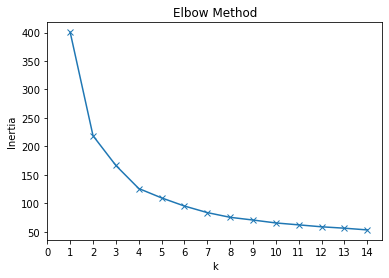

In [49]:
X = bike_avail_df
inertia = []
K = range(1,15)
for k in K:
    km = kmeans.set_params(n_clusters=k)
    km = km.fit(X)
    inertia.append(km.inertia_)
plt.plot(K, inertia, marker= "x")
plt.xlabel('k')
plt.xticks(np.arange(15))
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [50]:
kmean = kmeans.set_params(n_clusters = 4)
kmean = kmean.fit_predict(bike_avail_df)
bike_avail_df['cluster'] = kmean

<ipython-input-50-5342cbcff37c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_avail_df['cluster'] = kmean


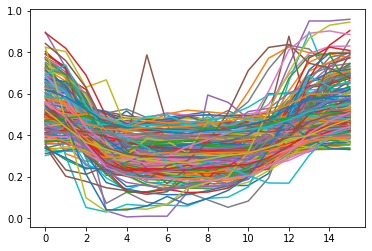

In [56]:
cluster_0 = bike_avail_df[bike_avail_df['cluster'] == 3]
cluster_0 = np.array(cluster_0)
for i in range(len(cluster_0)):
    plt.plot(range(16), cluster_0[i][:-1])